In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('data//dataset_Facebook.csv')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [5]:
df.columns = ['page_TL','type','category','post_M','post_W','post_H','paid','LPTR','LPTI','LEU','LP_Consumers','LP_consumptions', \
'LPI_PLpage','LPR_PLpage','L_PLP_EP','comment','like','share','TI']
df.head()

,page_TL,type,category,post_M,post_W,post_H,paid,LPTR,LPTI,LEU,LP_Consumers,LP_consumptions,LPI_PLpage,LPR_PLpage,L_PLP_EP,comment,like,share,TI
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [6]:
df.isna().sum()

page_TL            0
type               0
category           0
post_M             0
post_W             0
post_H             0
paid               1
LPTR               0
LPTI               0
LEU                0
LP_Consumers       0
LP_consumptions    0
LPI_PLpage         0
LPR_PLpage         0
L_PLP_EP           0
comment            0
like               1
share              4
TI                 0
dtype: int64

In [7]:
df.value_counts(df['type'])

type
Photo     426
Status     45
Link       22
Video       7
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   page_TL          500 non-null    int64  
 1   type             500 non-null    object 
 2   category         500 non-null    int64  
 3   post_M           500 non-null    int64  
 4   post_W           500 non-null    int64  
 5   post_H           500 non-null    int64  
 6   paid             499 non-null    float64
 7   LPTR             500 non-null    int64  
 8   LPTI             500 non-null    int64  
 9   LEU              500 non-null    int64  
 10  LP_Consumers     500 non-null    int64  
 11  LP_consumptions  500 non-null    int64  
 12  LPI_PLpage       500 non-null    int64  
 13  LPR_PLpage       500 non-null    int64  
 14  L_PLP_EP         500 non-null    int64  
 15  comment          500 non-null    int64  
 16  like             499 non-null    float64
 17  share           

In [9]:
df.dropna(inplace=True)

In [10]:
df.describe()

,page_TL,category,post_M,post_W,post_H,paid,LPTR,LPTI,LEU,LP_Consumers,LP_consumptions,LPI_PLpage,LPR_PLpage,L_PLP_EP,comment,like,share,TI
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,123173.268687,1.886869,7.028283,4.133333,7.844444,0.280808,14028.101010,2.985698e+04,926.830303,804.155556,1425.921212,1.691628e+04,6641.355556,614.135354,7.557576,179.145455,27.264646,213.967677
std,16203.818031,0.853268,3.304274,2.030735,4.385064,0.449849,22821.050008,7.714291e+04,987.713267,885.184440,2007.663460,6.007402e+04,7700.266455,614.346297,21.274384,324.412161,42.656388,381.677449
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.000000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,112324.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3331.000000,5.798000e+03,399.000000,335.000000,512.500000,4.073500e+03,2213.000000,297.500000,1.000000,57.000000,10.000000,72.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5290.000000,9.084000e+03,630.000000,555.000000,861.000000,6.282000e+03,3478.000000,416.000000,3.000000,101.000000,19.000000,125.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13248.000000,2.250300e+04,1062.000000,969.000000,1479.000000,1.514300e+04,8018.000000,658.500000,7.000000,188.000000,32.500000,231.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


In [11]:
df.value_counts(df['paid'])

paid
0.0    356
1.0    139
Name: count, dtype: int64

In [12]:
df.value_counts(df['type'])

type
Photo     421
Status     45
Link       22
Video       7
Name: count, dtype: int64

In [13]:
df['type'] = df['type'].map({'Link': 0, 'Photo': 1, 'Status': 2, 'Video': 3})
df = df.drop(['post_M','post_W','post_H'], axis=1)

5


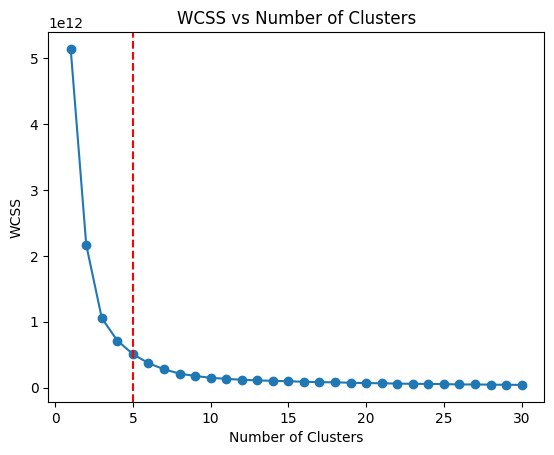

In [14]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss = []

for i in range(1, 31):
    km = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=0)
    model = km.fit(df)
    wcss.append(km.inertia_)

kl = KneeLocator(range(1, 31), wcss, curve='convex', direction='decreasing')
k_point = kl.elbow
print(k_point)

plt.plot(range(1, 31), wcss, marker='o')
plt.axvline(x=k_point, color='r', linestyle='--')
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)
model = km.fit(df)
df['cluster'] = model.labels_
df['cluster'].value_counts()

cluster
0    427
4     54
2     12
3      1
1      1
Name: count, dtype: int64

In [16]:
cluster_summary = df.groupby('cluster')[df.columns].mean()
cluster_summary.T

cluster,0,1,2,3,4
page_TL,123083.028103,92507.0,118068.583333,104070.0,125942.870370
type,1.065574,1.0,1.250000,1.0,1.111111
category,1.943794,3.0,1.583333,1.0,1.500000
paid,0.250585,0.0,0.333333,0.0,0.518519
LPTR,7070.046838,55520.0,113652.000000,49632.0,45481.925926
LPTI,11709.721311,665792.0,295582.166667,1110282.0,82520.277778
LEU,749.819672,4544.0,2156.583333,1653.0,1972.814815
LP_Consumers,671.875878,3586.0,1661.500000,1480.0,1595.592593
LP_consumptions,1220.637002,6624.0,2638.583333,2567.0,2662.314815
LPI_PLpage,7894.836066,648611.0,81273.916667,1107833.0,42050.592593


In [17]:
cluster_summary_of_type = df.groupby('cluster')['type'].value_counts()

cluster_summary_of_type

cluster  type
0        1       362
         2        42
         0        20
         3         3
1        1         1
2        1         9
         3         2
         0         1
3        1         1
4        1        48
         2         3
         3         2
         0         1
Name: count, dtype: int64

In [18]:
from sklearn.metrics import silhouette_score
ss = silhouette_score(df, df['cluster'])
print(ss)

0.6560216264892438


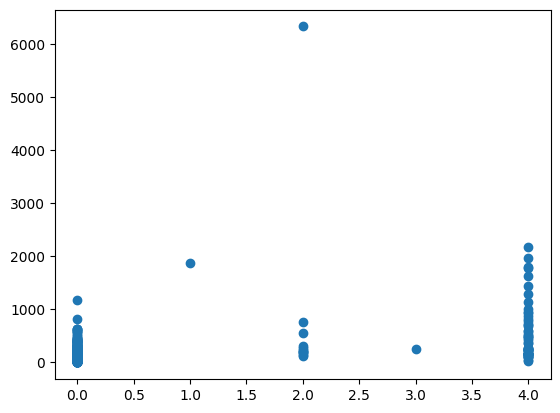

In [19]:
plt.plot(df['cluster'], df['TI'], 'o')
plt.show()

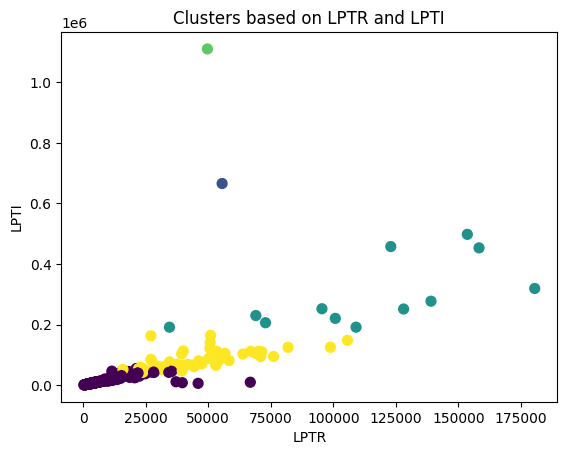

In [20]:
plt.scatter(df['LPTR'], df['LPTI'], c=df['cluster'], s=50, cmap='viridis')
plt.title('Clusters based on LPTR and LPTI')
plt.xlabel('LPTR')
plt.ylabel('LPTI')
plt.show()

for green and blue clusters there is life time total reach is low but high impression. 

In [21]:
print(df.groupby(df['cluster']==1)['category'].value_counts())
print(df.groupby(df['cluster']==3)['category'].value_counts())

cluster  category
False    1           211
         3           154
         2           129
True     3             1
Name: count, dtype: int64
cluster  category
False    1           210
         3           155
         2           129
True     1             1
Name: count, dtype: int64


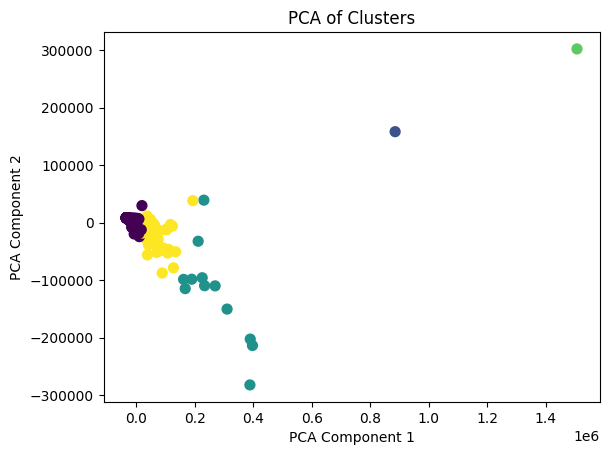

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = df.drop(['cluster'], axis=1)
pca_scaled = pca.fit_transform(X)

plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=df['cluster'], s=50, cmap='viridis')
plt.title('PCA of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

category 3 and 1 has high impression and low reach.

In [23]:
df.drop(['cluster','comment','like','share','page_TL'], axis=1, inplace=True)

In [24]:
df

,type,category,paid,LPTR,LPTI,LEU,LP_Consumers,LP_consumptions,LPI_PLpage,LPR_PLpage,L_PLP_EP,TI
0,1,2,0.0,2752,5091,178,109,159,3078,1640,119,100
1,2,2,0.0,10460,19057,1457,1361,1674,11710,6112,1108,164
2,1,3,0.0,2413,4373,177,113,154,2812,1503,132,80
3,1,2,1.0,50128,87991,2211,790,1119,61027,32048,1386,1777
4,1,2,0.0,7244,13594,671,410,580,6228,3200,396,393
...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,3,0.0,5400,9218,810,756,1003,5654,3230,422,176
495,1,3,0.0,4684,7536,733,708,985,4750,2876,392,84
496,1,2,0.0,3480,6229,537,508,687,3961,2104,301,75
497,1,1,0.0,3778,7216,625,572,795,4742,2388,363,115


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)
x_scaled.shape            

(495, 12)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(x_scaled)
pca_scaled.shape

(495, 2)

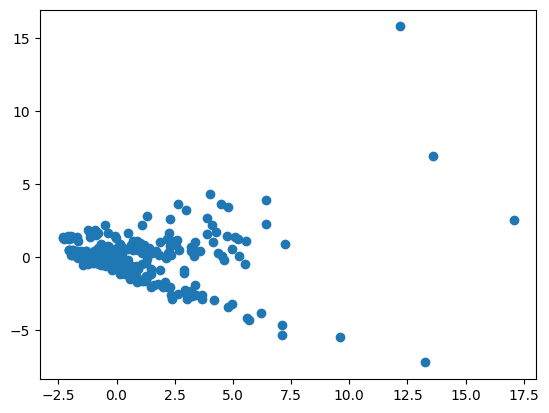

In [27]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1])

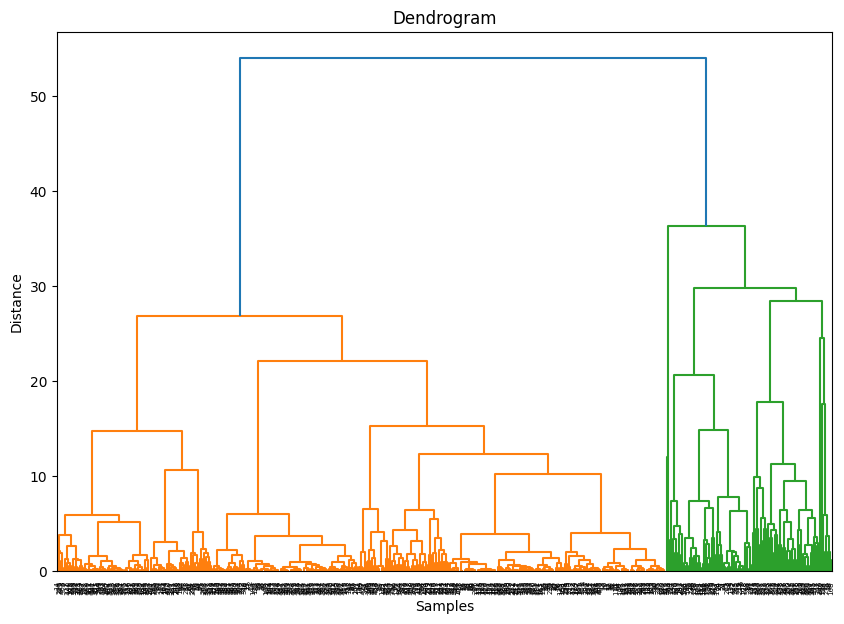

In [28]:
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(10, 7))
sc.dendrogram(sc.linkage(x_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

here according to dendrogram value of k is 2

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
hc.fit(x_scaled)

AgglomerativeClustering()

In [30]:
hc.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

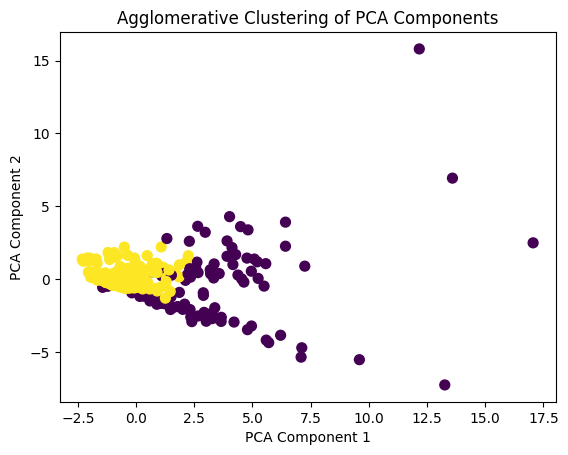

In [31]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=hc.labels_, s=50, cmap='viridis')
plt.title('Agglomerative Clustering of PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [32]:
from sklearn.metrics import silhouette_score
ss = silhouette_score(x_scaled, hc.labels_)
print(ss)

0.46415381476151607


In [33]:
df.corr()['L_PLP_EP'].sort_values(ascending=False)

L_PLP_EP           1.000000
LEU                0.838541
LP_Consumers       0.812726
LPR_PLpage         0.647033
LP_consumptions    0.575727
TI                 0.490967
type               0.486135
LPTR               0.398580
LPTI               0.322420
LPI_PLpage         0.308941
paid               0.050740
category           0.015816
Name: L_PLP_EP, dtype: float64

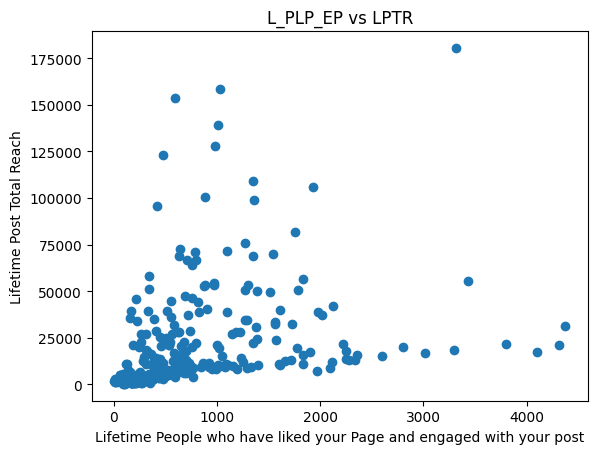

In [34]:
plt.plot(df['L_PLP_EP'], df['LPTR'], 'o')
plt.title('L_PLP_EP vs LPTR')
plt.xlabel('Lifetime People who have liked your Page and engaged with your post')
plt.ylabel('Lifetime Post Total Reach')
plt.show()

in this mostly we show is lifetime post reach is low then Lifetime People who have liked your Page and engaged with your post is also low.

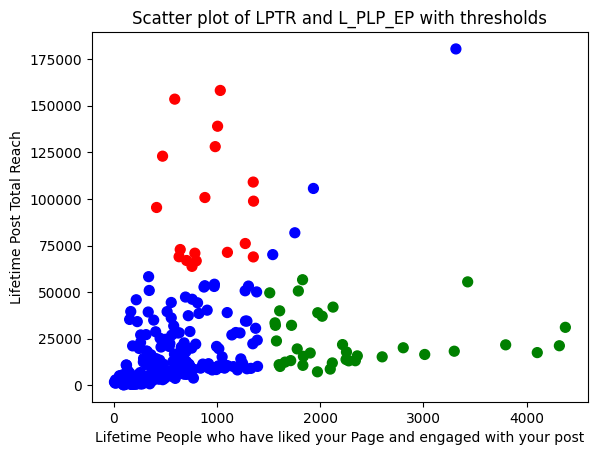

In [36]:
reach_threshold = 60000
engaged_threshold = 1500

colors = [
    'green' if ((r < reach_threshold) and (e > engaged_threshold)) 
    else 'red' if ((r > reach_threshold) and (e < engaged_threshold)) 
    else 'blue' for r, e in zip(df['LPTR'], df['L_PLP_EP'])
]

plt.scatter(df['L_PLP_EP'], df['LPTR'], c=colors, s=50)
plt.title('Scatter plot of LPTR and L_PLP_EP with thresholds')
plt.xlabel('Lifetime People who have liked your Page and engaged with your post')
plt.ylabel('Lifetime Post Total Reach')
plt.show()

🌟 in this graph green data points states that it has a low reach but high engagement so that is a good post for people or for organization and red data points states that it has a high reach but low engagement so that type of post is not entertain the people and blue data point is everage posts that increase exponantialy.